#### CMSE 201 Final Project
### &#9989; Katie Pocock
### &#9989; Section_004
#### &#9989; December 5, 2021

# Which Food Group Produces the Most CO2 Waste During Processing?


## Background and Motivation

The problem of greenhouse gas is extremely prevelant and only becoming worse. According to the United States Environmental Protection Agency, the "Total U.S. Emissions in 2019 is equivalent to 6,558 Million Metric Tons of CO2  (excludes land sector)." That is only the United States and is increasing every year. A huge contributor to the increase is food production. Human being are massive consumers and the amount of food we produce to consume and to be wasted is incredibly large and also increasing.

I have always been interested in the conservation of Earth. When I found a dataset with information about how much greenhouse gas is coming directly from food production I was extremely interested. I have always wondered how much of an impact I have by cutting meat out of my diet for most of my life and if there is actually evidence to prove the impact of cutting it out of my diet. That is why I decided to chose this question and look into what kinds of impact someone may have on greenhouse gas emissions by doing something as simple as cutting out meat or diary. I am vegetarian and limit my consumption of diary. My hypothesis is that protein production results in the most greenhouse gas waste being added to the ecosystem. By finding which food group has the greatest impact maybe those who are conscious of the environment and willing to make small life changes could have a better impact on the waste they produce by their food consumption. 

This dataset looks at the different stages of production of certain food types. Since each food product goes through a unique production process the numbers are different and sometimes zero. This dataset is simplified and does not show the variation that may occur between different regions, ecological profiles, type of production system, or size or the product. The greenhouse gas (GHG) emissions are measured in kilograms of carbon dioxide equivalents (kg CO2e per kg) of food produced. Each food product in the dataframe is listed with global average GHG emissions from each stage of the food value chain from Land, Farm, Animal Feed, Processing, Transport, Packaging, up to Retail.

## Methodology


In [206]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
food_data= pd.read_csv('Food_Product_Emissions.csv')
#food_data = pd.read_csv('Food_Product_Emissions.csv')
#food_data = food_data.drop(columns='Total from Land to Retail')


Most food products can be divided into 5 main food groups. The food groups we will be focusing on are...

- _Fruit_
- _Vegetables_
- _Dairy_
- _Protein_
- _Grain_

For the sake of this project, since some of the given products do not fit into any of these common groups, I have decided to drop products. For example, I do not want to focus on drinks such as wine or on kinds of oils or sugars since those do not correlate with a food group. Therefore the resulting dataset we require will be called food_data_new.


In [207]:
food_data_new = food_data.drop([5,7,8,9,12,13,22,25,27,32,36,38,42])
food_data_new

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
0,Apples,-0.029,0.000,0.225,0.004,0.096,0.044,0.017,0.357,0.43,kg CO2e per kg food produced
1,Bananas,-0.025,0.000,0.266,0.059,0.292,0.065,0.021,0.678,0.86,kg CO2e per kg food produced
2,Barley,0.009,0.000,0.176,0.128,0.035,0.497,0.264,1.109,1.18,kg CO2e per kg food produced
3,Beef (beef herd),16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48,kg CO2e per kg food produced
4,Beef (dairy herd),0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30,kg CO2e per kg food produced
6,Berries & Grapes,0.025,0.000,0.722,0.000,0.238,0.212,0.017,1.214,1.53,kg CO2e per kg food produced
10,Cheese,4.455,2.346,13.059,0.738,0.138,0.172,0.332,21.240,23.88,kg CO2e per kg food produced
11,Citrus Fruit,-0.146,0.000,0.307,0.000,0.094,0.045,0.017,0.317,0.39,kg CO2e per kg food produced
14,Eggs,0.709,2.200,1.317,0.000,0.084,0.161,0.036,4.507,4.67,kg CO2e per kg food produced
15,Fish (farmed),0.534,0.819,3.598,0.020,0.111,0.061,0.040,5.183,13.63,kg CO2e per kg food produced


Now, since the objective of this project is to determine which of our food groups produces the most CO2 emissions, splitting up the data into different groups through a for loop will give us the desired grouped data. Then setting these lists of the data to be an entire new dataframe allows us to do more manipulation with them later on. This will allow us to manipulate the data and find the greatest values to find which produces the most in the future. 

In [347]:
fruit_group = []
grain_group = []
protein_group = []
dairy_group = []
vegetable_group = []

#food_names = food_data_new[product_name]
for i in food_data_new['Food product']:
    if i == 'Apples':
        fruit_group.append(food_data_new.loc[0])
    if i == 'Bananas':
        fruit_group.append(food_data_new.loc[1])
    if i == 'Berries & Grapes':
        fruit_group.append(food_data_new.loc[6])
    if i == 'Citrus Fruit':
        fruit_group.append(food_data_new.loc[11])
    if i == 'Other Fruit':
        fruit_group.append(food_data_new.loc[24])
    if i == 'Barley':
        grain_group.append(food_data_new.loc[2])
    if i == 'Oatmeal':
        grain_group.append(food_data_new.loc[21])
    if i == 'Rice':
        grain_group.append(food_data_new.loc[33])
    if i == 'Wheat & Rye':
        grain_group.append(food_data_new.loc[41])
    if i == 'Beef (beef herd)':
        protein_group.append(food_data_new.loc[3])
    if i == 'Fish (farmed)':
        protein_group.append(food_data_new.loc[15])
    if i == 'Groundnuts':
        protein_group.append(food_data_new.loc[16])
    if i == 'Lamb & Mutton':
        protein_group.append(food_data_new.loc[17])
    if i == 'Nuts':
        protein_group.append(food_data_new.loc[20])
    if i == 'Pig Meat':
        protein_group.append(food_data_new.loc[29])
    if i == 'Poultry Meat':
        protein_group.append(food_data_new.loc[31])
    if i == 'Shrimps (farmed)':
        protein_group.append(food_data_new.loc[35])
    if i == 'Eggs':
        protein_group.append(food_data_new.loc[14])
    if i == 'Maize':
        vegetable_group.append(food_data_new.loc[18])
    if i == 'Onions & Leeks':
        vegetable_group.append(food_data_new.loc[23])
    if i == 'Other Vegetables':
        vegetable_group.append(food_data_new.loc[26])
    if i == 'Peas':
        vegetable_group.append(food_data_new.loc[28])
    if i == 'Potatoes':
        vegetable_group.append(food_data_new.loc[30])
    if i == 'Root Vegetables':
        vegetable_group.append(food_data_new.loc[34])
    if i == 'Tofu':
        vegetable_group.append(food_data_new.loc[39])
    if i == 'Tomatoes':
        vegetable_group.append(food_data_new.loc[40])
    if i == 'Cheese':
        dairy_group.append(food_data_new.loc[10])
    if i == 'Milk':
        dairy_group.append(food_data_new.loc[19])
    if i == 'Soymilk':
        dairy_group.append(food_data_new.loc[37])
    if i == 'Beef (dairy herd)':
        dairy_group.append(food_data_new.loc[4])
fruit_df = pd.DataFrame(fruit_group)
grain_df = pd.DataFrame(grain_group)
protein_df = pd.DataFrame(protein_group)
vegetable_df = pd.DataFrame(vegetable_group)
dairy_df = pd.DataFrame(dairy_group)

fruit_df


,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
0,Apples,-0.029,0.0,0.225,0.004,0.096,0.044,0.017,0.357,0.43,kg CO2e per kg food produced
1,Bananas,-0.025,0.0,0.266,0.059,0.292,0.065,0.021,0.678,0.86,kg CO2e per kg food produced
6,Berries & Grapes,0.025,0.0,0.722,0.000,0.238,0.212,0.017,1.214,1.53,kg CO2e per kg food produced
11,Citrus Fruit,-0.146,0.0,0.307,0.000,0.094,0.045,0.017,0.317,0.39,kg CO2e per kg food produced
24,Other Fruit,0.126,0.0,0.369,0.015,0.182,0.042,0.016,0.750,1.05,kg CO2e per kg food produced


In [348]:
grain_df

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
2,Barley,0.009,0.0,0.176,0.128,0.035,0.497,0.264,1.109,1.18,kg CO2e per kg food produced
21,Oatmeal,0.001,0.0,1.370,0.042,0.067,0.066,0.029,1.575,2.48,kg CO2e per kg food produced
33,Rice,-0.022,0.0,3.553,0.065,0.096,0.084,0.063,3.839,4.45,kg CO2e per kg food produced
41,Wheat & Rye,0.100,0.0,0.847,0.217,0.129,0.090,0.058,1.441,1.57,kg CO2e per kg food produced


In [349]:
protein_df

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
3,Beef (beef herd),16.278,1.878,39.388,1.269,0.346,0.247,0.164,59.570,99.48,kg CO2e per kg food produced
14,Eggs,0.709,2.200,1.317,0.000,0.084,0.161,0.036,4.507,4.67,kg CO2e per kg food produced
15,Fish (farmed),0.534,0.819,3.598,0.020,0.111,0.061,0.040,5.183,13.63,kg CO2e per kg food produced
16,Groundnuts,0.439,0.000,1.425,0.372,0.120,0.099,0.042,2.497,3.23,kg CO2e per kg food produced
17,Lamb & Mutton,0.468,2.370,19.508,1.111,0.490,0.251,0.217,24.415,39.72,kg CO2e per kg food produced
20,Nuts,-2.052,0.000,2.126,0.032,0.067,0.078,0.027,0.278,0.43,kg CO2e per kg food produced
29,Pig Meat,1.535,2.940,1.694,0.284,0.343,0.296,0.190,7.282,12.31,kg CO2e per kg food produced
31,Poultry Meat,2.540,1.775,0.672,0.440,0.276,0.212,0.177,6.092,9.87,kg CO2e per kg food produced
35,Shrimps (farmed),0.206,2.510,8.379,0.000,0.206,0.334,0.219,11.854,26.87,kg CO2e per kg food produced


In [350]:
vegetable_df

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
18,Maize,0.315,0.0,0.475,0.052,0.060,0.060,0.026,0.988,1.70,kg CO2e per kg food produced
23,Onions & Leeks,0.005,0.0,0.211,0.000,0.095,0.045,0.039,0.395,0.50,kg CO2e per kg food produced
26,Other Vegetables,0.001,0.0,0.174,0.060,0.164,0.041,0.015,0.455,0.53,kg CO2e per kg food produced
28,Peas,0.000,0.0,0.717,0.000,0.095,0.045,0.039,0.896,0.98,kg CO2e per kg food produced
30,Potatoes,-0.001,0.0,0.193,0.000,0.094,0.045,0.039,0.370,0.46,kg CO2e per kg food produced
34,Root Vegetables,0.013,0.0,0.154,0.000,0.114,0.045,0.039,0.365,0.43,kg CO2e per kg food produced
39,Tofu,0.958,0.0,0.495,0.794,0.177,0.177,0.270,2.871,3.16,kg CO2e per kg food produced
40,Tomatoes,0.372,0.0,0.704,0.012,0.177,0.145,0.017,1.427,2.09,kg CO2e per kg food produced


In [351]:
dairy_df

,Food product,Land Use Change,Feed,Farm,Processing,Transport,Packaging,Retail,Total from Land to Retail,Total Global Average GHG Emissions per kg,Unit of GHG Emissions
4,Beef (dairy herd),0.906,2.508,15.689,1.108,0.424,0.268,0.182,21.085,33.30,kg CO2e per kg food produced
10,Cheese,4.455,2.346,13.059,0.738,0.138,0.172,0.332,21.240,23.88,kg CO2e per kg food produced
19,Milk,0.495,0.236,1.458,0.149,0.090,0.097,0.256,2.781,3.15,kg CO2e per kg food produced
37,Soymilk,0.180,0.000,0.093,0.163,0.110,0.098,0.270,0.914,0.98,kg CO2e per kg food produced


In [352]:
fruit_min = fruit_df['Total Global Average GHG Emissions per kg'].min()
fruit_max = fruit_df['Total Global Average GHG Emissions per kg'].max()
fruit_std = fruit_df['Total Global Average GHG Emissions per kg'].std()
print('The minimum GHG Emission value for the fruit food group is', fruit_min, 'the maximum value is', fruit_max, 'and the standard deviation is,', fruit_std)

grain_min = grain_df['Total Global Average GHG Emissions per kg'].min()
grain_max = grain_df['Total Global Average GHG Emissions per kg'].max()
grain_std = grain_df['Total Global Average GHG Emissions per kg'].std()
print('The minimum GHG Emission value for the grain food group is', grain_min, 'the maximum value is', grain_max, 'and the standard deviation is,', grain_std)

protein_min = protein_df['Total Global Average GHG Emissions per kg'].min()
protein_max = protein_df['Total Global Average GHG Emissions per kg'].max()
protein_std = protein_df['Total Global Average GHG Emissions per kg'].std()
print('The minimum GHG Emission value for the protein food group is', protein_min, 'the maximum value is', protein_max, 'and the standard deviation is,', protein_std)

vegetable_min = vegetable_df['Total Global Average GHG Emissions per kg'].min()
vegetable_max = vegetable_df['Total Global Average GHG Emissions per kg'].max()
vegetable_std = vegetable_df['Total Global Average GHG Emissions per kg'].std()
print('The minimum GHG Emission value for the vegetable food group is', vegetable_min, 'the maximum value is', vegetable_max, 'and the standard deviation is,', vegetable_std)

dairy_min = dairy_df['Total Global Average GHG Emissions per kg'].min()
dairy_max = dairy_df['Total Global Average GHG Emissions per kg'].max()
dairy_std = dairy_df['Total Global Average GHG Emissions per kg'].std()
print('The minimum GHG Emission value for the dairy food group is', dairy_min, 'the maximum value is', dairy_max, 'and the standard deviation is,', dairy_std)


The minimum GHG Emission value for the fruit food group is 0.39 the maximum value is 1.53 and the standard deviation is, 0.47182623920252675
The minimum GHG Emission value for the grain food group is 1.18 the maximum value is 4.45 and the standard deviation is, 1.4588351517563594
The minimum GHG Emission value for the protein food group is 0.43 the maximum value is 99.48 and the standard deviation is, 31.1313696293626
The minimum GHG Emission value for the vegetable food group is 0.43 the maximum value is 3.16 and the standard deviation is, 1.000263358178378
The minimum GHG Emission value for the dairy food group is 0.98 the maximum value is 33.3 and the standard deviation is, 15.814532082866062


Above is an example of each food group now in its own dataset. We have the diary one which is only 4 products. We can easily determine that Beef (dairy heard) is producing a much greater Total Global Average GHG Emission per kg produced than Soymilk is. We can also access that every column of Cheese and Beef(dairy heard) production produces more emissions compared to both milk and soymilk. 

It is also important to look into more details of each food group allows us to compare minimum and maximum values of each food group. We do this by using the math function we imported at the beginning of our notebook. This allows us to easily find the maximum, minimum, and standard deviation of our values within each dataset. 

Next, finding the mean of each food group allows us to see which food group is producing the most CO2 emission waste which will answer our question!

In [353]:
count_fruit = fruit_df.shape[0]
fruit_mean = sum(fruit_df['Total Global Average GHG Emissions per kg'])/count_fruit
print('The mean of the fruit food groups Total Global Average GHG Emissions per kg is', fruit_mean)

count_grain = grain_df.shape[0]
grain_mean = sum(grain_df['Total Global Average GHG Emissions per kg'])/count_grain
print('The mean of the grain food groups Total Global Average GHG Emissions per kg is', grain_mean)


count_protein = protein_df.shape[0]
protein_mean = sum(protein_df['Total Global Average GHG Emissions per kg'])/count_protein
print('The mean of the protein food groups Total Global Average GHG Emissions per kg is', protein_mean)


count_vegetable = vegetable_df.shape[0]
vegetable_mean = sum(vegetable_df['Total Global Average GHG Emissions per kg'])/count_vegetable
print('The mean of the vegetable food groups Total Global Average GHG Emissions per kg is', vegetable_mean)


count_dairy = dairy_df.shape[0]
dairy_mean = sum(dairy_df['Total Global Average GHG Emissions per kg'])/count_dairy
print('The mean of the dairy food groups Total Global Average GHG Emissions per kg is', dairy_mean)


The mean of the fruit food groups Total Global Average GHG Emissions per kg is 0.8520000000000001
The mean of the grain food groups Total Global Average GHG Emissions per kg is 2.42
The mean of the protein food groups Total Global Average GHG Emissions per kg is 23.35666666666667
The mean of the vegetable food groups Total Global Average GHG Emissions per kg is 1.2312500000000002
The mean of the dairy food groups Total Global Average GHG Emissions per kg is 15.327499999999997


In [354]:
total_means = []
total_means.append(fruit_mean)
total_means.append(grain_mean)
total_means.append(protein_mean)
total_means.append(dairy_mean)
total_means.append(vegetable_mean)

max_mean = max(total_means)
print('The food group that produces the most GHG emissions is the protein group with a mean of',max_mean)

The food group that produces the most GHG emissions is the protein group with a mean of 23.35666666666667


## Results


In order to get the most from our food group data, we can sort the dataframe so that the columns are in order of low to high Total Global Average GHG Emissions per kg. This way we can asses where the minimum 

In [355]:
fruit_sorted = fruit_df.sort_values(['Total Global Average GHG Emissions per kg'])
grain_sorted = grain_df.sort_values(['Total Global Average GHG Emissions per kg'])
protein_sorted = protein_df.sort_values(['Total Global Average GHG Emissions per kg'])
vegetable_sorted = vegetable_df.sort_values(['Total Global Average GHG Emissions per kg'])
dairy_sorted = dairy_df.sort_values(['Total Global Average GHG Emissions per kg'])

Text(0, 0.5, 'Total Average GHG Emissions')

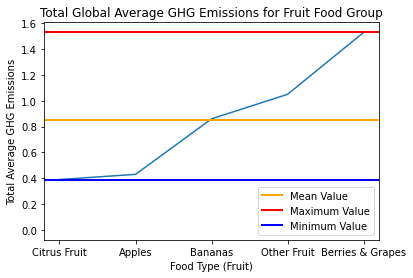

In [356]:
plt.plot(fruit_sorted['Food product'],fruit_sorted['Total Global Average GHG Emissions per kg'],0)
plt.title('Total Global Average GHG Emissions for Fruit Food Group')
plt.axhline(y=fruit_mean,linewidth=2, color='orange',label = "Mean Value")
plt.axhline(y=fruit_max,linewidth=2, color='r',label = "Maximum Value")
plt.axhline(y=fruit_min,linewidth=2, color='b',label = "Minimum Value")
plt.legend()
plt.xlabel('Food Type (Fruit)')
plt.ylabel('Total Average GHG Emissions')

We can easily asses from the graph which food type is contributing the greatest to the greenhouse gas waste. Here it goes low to high from Citrus Fruit to Berries and Grapes. The mean value is also in the middle of the data which allows us to determine there is not much of a standard of deviation for the fruit food group. Similar conclusions can be drawn from the next few graphs, the protein graph is very interesting though because the mean is much lower than the median which we know from our methodology that the standard of deviation is high. This is due to some protein not requiring as much energy to produce as others. For example Beef (beef herd) is extremely more than the Nuts. 

Text(36.625, 0.5, 'Total Average GHG Emissions')

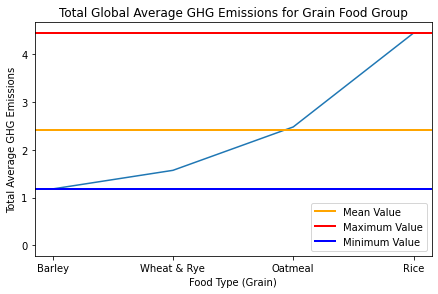

In [357]:
plt.plot(grain_sorted['Food product'],grain_sorted['Total Global Average GHG Emissions per kg'],0)
plt.title('Total Global Average GHG Emissions for Grain Food Group')
plt.axhline(y=grain_mean,linewidth=2, color='orange',label = "Mean Value")
plt.axhline(y=grain_max,linewidth=2, color='r',label = "Maximum Value")
plt.axhline(y=grain_min,linewidth=2, color='b',label = "Minimum Value")
plt.legend()
plt.tight_layout()
plt.xlabel('Food Type (Grain)')
plt.ylabel('Total Average GHG Emissions')

([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'Nuts'),
  Text(1, 0, 'Groundnuts'),
  Text(2, 0, 'Eggs'),
  Text(3, 0, 'Poultry Meat'),
  Text(4, 0, 'Pig Meat'),
  Text(5, 0, 'Fish (farmed)'),
  Text(6, 0, 'Shrimps (farmed)'),
  Text(7, 0, 'Lamb & Mutton'),
  Text(8, 0, 'Beef (beef herd)')])

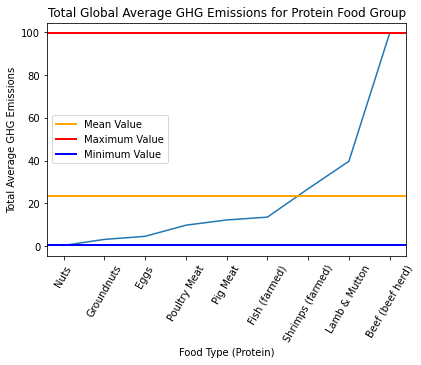

In [358]:

plt.plot(protein_sorted['Food product'],protein_sorted['Total Global Average GHG Emissions per kg'])
plt.title('Total Global Average GHG Emissions for Protein Food Group')
plt.axhline(y=protein_mean,linewidth=2, color='orange',label = "Mean Value")
plt.axhline(y=protein_max,linewidth=2, color='r',label = "Maximum Value")
plt.axhline(y=protein_min,linewidth=2, color='b',label = "Minimum Value")
plt.legend()
plt.tight_layout()
plt.xlabel('Food Type (Protein)')
plt.ylabel('Total Average GHG Emissions')
plt.xticks(rotation = 60)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'Root Vegetables'),
  Text(1, 0, 'Potatoes'),
  Text(2, 0, 'Onions & Leeks'),
  Text(3, 0, 'Other Vegetables'),
  Text(4, 0, 'Peas'),
  Text(5, 0, 'Maize'),
  Text(6, 0, 'Tomatoes'),
  Text(7, 0, 'Tofu')])

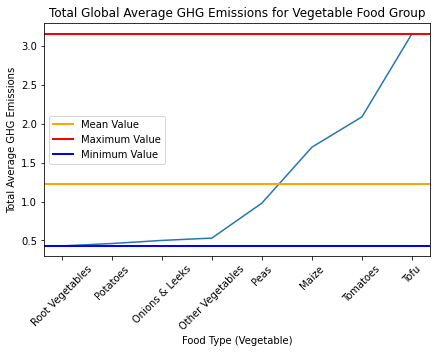

In [359]:

plt.plot(vegetable_sorted['Food product'],vegetable_sorted['Total Global Average GHG Emissions per kg'])
plt.title('Total Global Average GHG Emissions for Vegetable Food Group')
plt.axhline(y=vegetable_mean,linewidth=2, color='orange',label = "Mean Value")
plt.axhline(y=vegetable_max,linewidth=2, color='r',label = "Maximum Value")
plt.axhline(y=vegetable_min,linewidth=2, color='b',label = "Minimum Value")
plt.legend()
plt.tight_layout()
plt.xlabel('Food Type (Vegetable)')
plt.ylabel('Total Average GHG Emissions')
plt.xticks(rotation = 45)


Text(30.25, 0.5, 'Total Average GHG Emissions')

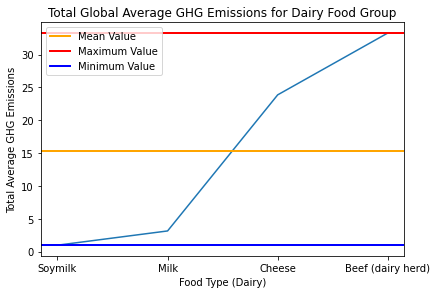

In [360]:

plt.plot(dairy_sorted['Food product'],dairy_sorted['Total Global Average GHG Emissions per kg'])
plt.title('Total Global Average GHG Emissions for Dairy Food Group')
plt.axhline(y=dairy_mean,linewidth=2, color='orange',label = "Mean Value")
plt.axhline(y=dairy_max,linewidth=2, color='r',label = "Maximum Value")
plt.axhline(y=dairy_min,linewidth=2, color='b',label = "Minimum Value")
plt.legend()
plt.tight_layout()
plt.xlabel('Food Type (Dairy)')
plt.ylabel('Total Average GHG Emissions')

Text(0.5, 1.0, 'The GHG Emissions for Each Food Type')

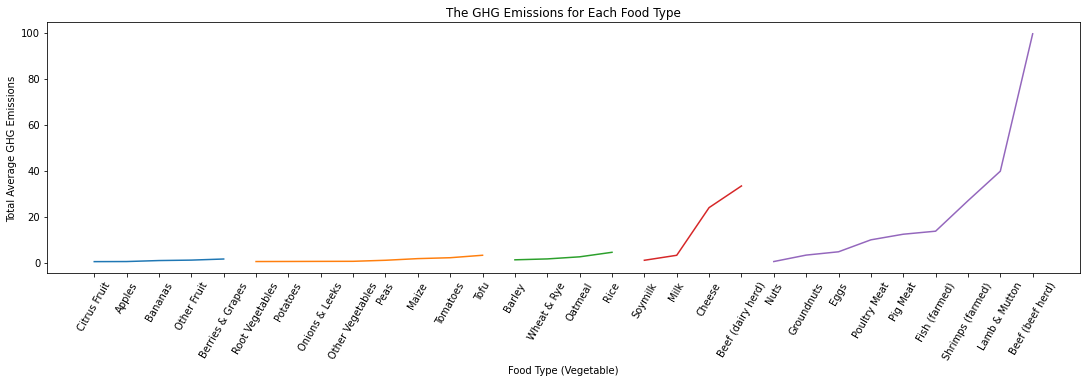

In [361]:
fig = plt.figure(figsize=(15,5))

plt.plot(fruit_sorted['Food product'],fruit_sorted['Total Global Average GHG Emissions per kg'])
plt.plot(vegetable_sorted['Food product'],vegetable_sorted['Total Global Average GHG Emissions per kg'])
plt.plot(grain_sorted['Food product'],grain_sorted['Total Global Average GHG Emissions per kg'])
plt.plot(dairy_sorted['Food product'],dairy_sorted['Total Global Average GHG Emissions per kg'])
plt.plot(protein_sorted['Food product'],protein_sorted['Total Global Average GHG Emissions per kg'])

plt.xticks(rotation = 60)
plt.tight_layout()
plt.xlabel('Food Type (Vegetable)')
plt.ylabel('Total Average GHG Emissions')
plt.title('The GHG Emissions for Each Food Type')

Text(0.5, 24.0, 'GHG emissions per kg')

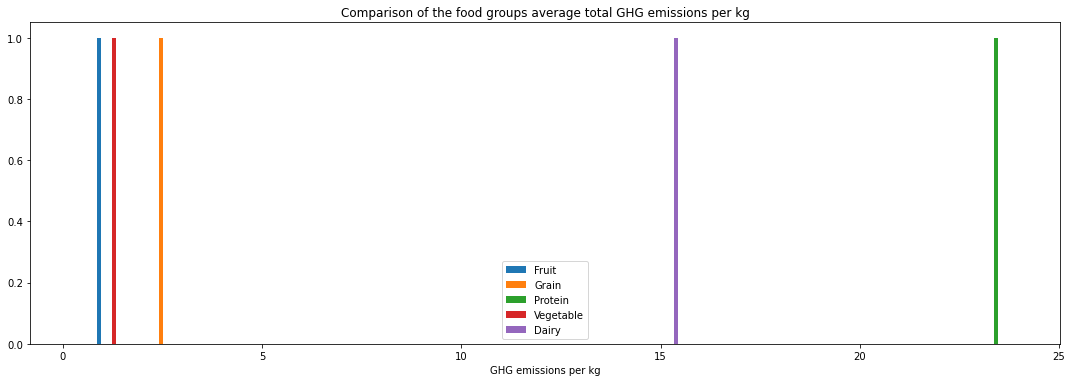

In [362]:
fig = plt.figure(figsize=(15,5))

plt.hist(fruit_mean, label = 'Fruit')
plt.hist(grain_mean, label = 'Grain')
plt.hist(protein_mean, label = 'Protein')
plt.hist(vegetable_mean, label = 'Vegetable')
plt.hist(dairy_mean, label = 'Dairy')

plt.legend()
plt.tight_layout()
plt.title('Comparison of the food groups average total GHG emissions per kg')
plt.xlabel('GHG emissions per kg')

## Discussion and Conclusion


Overall, we have the evidence to access that the protein food group produces the most CO2 emission waste per kg produced. This supports the initial hypothesis made which is not surprising. Since the animals (protein) require to be fed and raised to produce or used for consumption, more energy is required to produce the large amounts of protein that humans consume.

The order of food groups we found was...
<center> 
    1. Protein
    
    2. Dairy
   
    3. Grain
    
    4. Vegetable
    
    5. Fruit

My personal interest in the topic only grew further. I believe cutting meat out of my diet may feel like it is not doing much but my impact does mean something when the data shows just how much greenhouse gas is added due to protein production. I do still eat eggs and other forms of protein but with the greatest numbers coming from red meat my impact is shown. 
    
This study is limited in the sense of the data we are working with. While the overall dataset is large enough to warrant testing, each of the subject data frames are different sizes. For example when comparing vegetables which included 8 rows to dairy which was only 4 we know that there are more  products that are produced and could have a large impact on our dataframe's results if taken into account. This dataset provides the very common and well-known products therefore the conclusions made are usable but more data could be taken into account with a broader initial set of food products analyzed.  

If I were to continue working with this data I would find more of the original sources of where the food types were researched and see if I could include more types of food. I would also look into the food types I took out and see if a new food group is worth creating such as oils or sugars and how much that is included in a average diet.

### References

1. AmandaRoseKnudsen. “Foodemissions.” Kaggle, 20 Oct. 2021, https://www.kaggle.com/amandaroseknudsen/foodproductemissions. 

2. EPA, Environmental Protection Agency, https://www.epa.gov/ghgemissions/overview-greenhouse-gases. 

3. “Protein Foods.” MyPlate, https://www.myplate.gov/eat-healthy/protein-foods#:~:text=All%20foods%20made%20from%20seafood,of%20the%20Protein%20Foods%20Group. 